# Librerias 

In [1]:
import pandas as pd
import seaborn as sns
print('Librerias listas.')

Librerias listas.


# 1) Acceso a Internet

## Penetración de Internet fijo (accesos por cada 100 hogares)

In [96]:
# Extraemos datos de la API
MY_API_KEY = 'C98wmDseqmuXTUVe7Z297LQBdUXD0yaqXLXJuSoh'
url = 'http://api.datosabiertos.enacom.gob.ar/api/v2/visualizations/PENET-DE-INTER-FIJO-57760/?auth_key=' + MY_API_KEY + '&output=csv'
data = pd.read_csv(url)
data.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,"76,08"
1,2022,1,Capital Federal,"111,8"
2,2022,1,Catamarca,"58,21"
3,2022,1,Chaco,"44,06"
4,2022,1,Chubut,"88,05"


<AxesSubplot:>

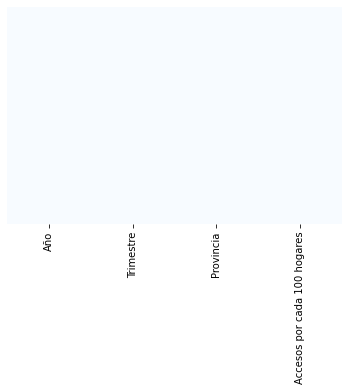

In [97]:
# Visualización de valores nulos en el DataFrame
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

No contiene valores nulos.

In [98]:
# Tipo de variable que tenemos
data.dtypes

Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object

La variable 'Accesos por cada 100 hogares' la esta tomando como tipo **object**, debemos corregirla al reemplazar las comas por puntos y pasarla a tipo float.

In [99]:
# Reemplazamos comas por puntos
data['Accesos por cada 100 hogares'] = data['Accesos por cada 100 hogares'].str.replace(',', '.')
# Cambio de tipo de variables
data['Accesos por cada 100 hogares'] = data['Accesos por cada 100 hogares'].astype('float64')
data.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,76.08
1,2022,1,Capital Federal,111.80
2,2022,1,Catamarca,58.21
3,2022,1,Chaco,44.06
4,2022,1,Chubut,88.05


In [100]:
# Tipo de variable corregidas
data.dtypes

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object

Para que los diferentes datasets se relacionen con la variable de 'Provinvia', pasamos sus valores a mayúsculas sin acentos.

In [101]:
def standarProv(val):
    if val == 'Capital Federal':
        return 'CABA'
    else:
        return val.replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u").upper()

# Aplicamos la función
data['Provincia'] = data['Provincia'].apply(lambda x: standarProv(x))
data.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,BUENOS AIRES,76.08
1,2022,1,CABA,111.80
2,2022,1,CATAMARCA,58.21
3,2022,1,CHACO,44.06
4,2022,1,CHUBUT,88.05


array([[<AxesSubplot:title={'center':'Año'}>,
        <AxesSubplot:title={'center':'Trimestre'}>],
       [<AxesSubplot:title={'center':'Accesos por cada 100 hogares'}>,
        <AxesSubplot:>]], dtype=object)

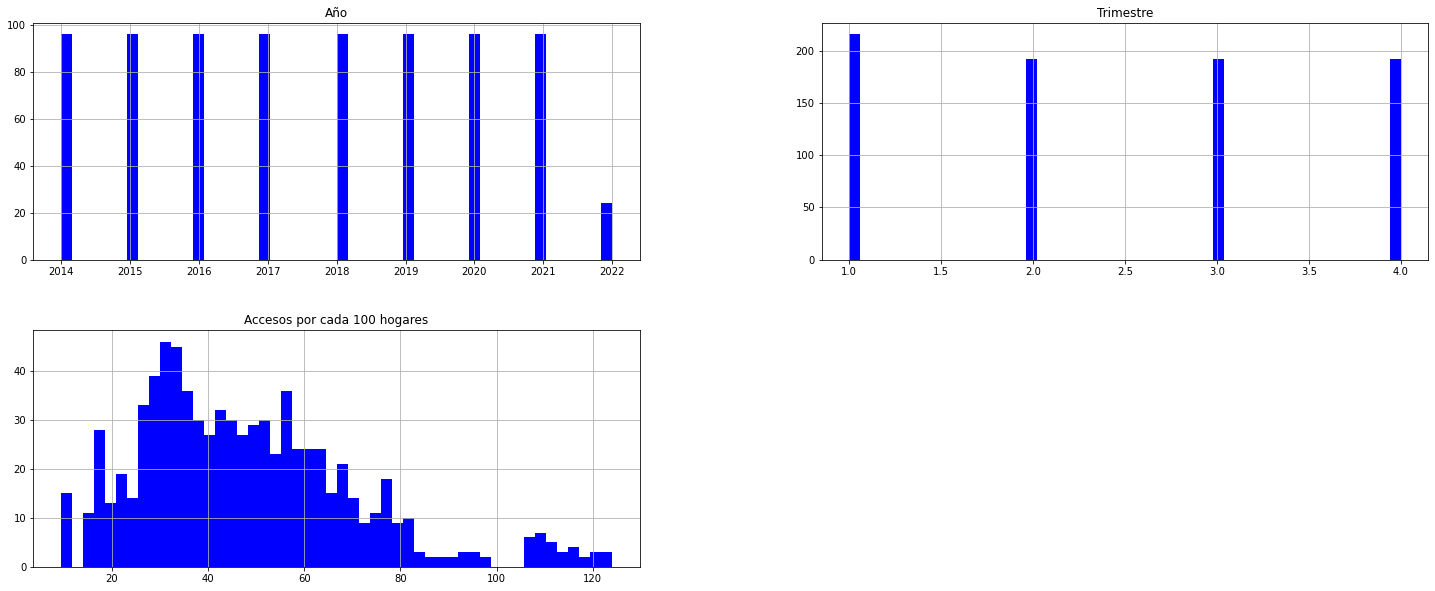

In [102]:
# Análisis rápido de las categorías usando un histograma.
data.hist(bins = 50, figsize = (25,10), color = 'b')

**Año**: Vemos que esta columna cuenta con solo un 20% de registros del 2022.

**Trimestre**: Esta columna no presenta anomalias tan aparentes.

**Accesos por cada 100 hogares**: Presenta una distribución sesgada a la izquierda, con la media de sus valores al rededor del 48%. 

In [103]:
# Resumen global de estadisticos:
data.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,792.000000,792.000000,792.000000
mean,2017.636364,2.454545,47.907184
std,2.386030,1.131306,22.810661
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,31.540000
50%,2018.000000,2.000000,44.625000
75%,2020.000000,3.000000,60.575000
max,2022.000000,4.000000,124.060000


Observamos que se cuenta con 9 accesos por cada 100 hogares como mínimo y 124 accesos por cada 100 hogares como máximo.

In [104]:
# Guardamos este DataFrame para su analisis en Power BI.
data.to_csv('01_Acceso100Hogares.csv', index=False)
print('Guardado.')

Guardado.


## Listado de localidades con conectividad a internet.

In [80]:
# Extraemos datos de la API
MY_API_KEY = 'C98wmDseqmuXTUVe7Z297LQBdUXD0yaqXLXJuSoh'
url = 'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/LISTA-DE-LOCAL-CON-CONEC/data.csv/?auth_key=' + MY_API_KEY
data = pd.read_csv(url)
data.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,25 de Mayo,25 de Mayo,SI,SI,--,SI,SI,SI,SI,SI,SI
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,--,--,--,--,--,--,SI,--,--
2,BUENOS AIRES,25 de Mayo,Del Valle,SI,--,--,--,SI,SI,--,--,SI
3,BUENOS AIRES,25 de Mayo,Ernestina,SI,--,--,--,--,--,--,--,--
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,--,--,--,--,--,--,--,SI,--


<AxesSubplot:>

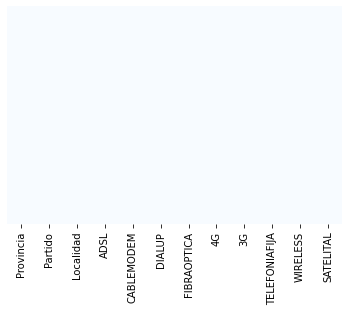

In [81]:
# Visualización de valores nulos en el DataFrame
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

No contiene valores nulos.

In [82]:
# Tipo de variable que tenemos
data.dtypes

Provincia        object
Partido          object
Localidad        object
ADSL             object
CABLEMODEM       object
DIALUP           object
FIBRAOPTICA      object
4G               object
3G               object
TELEFONIAFIJA    object
WIRELESS         object
SATELITAL        object
dtype: object

Las variables 'ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS' y 'SATELITAL' las esta tomando como tipo **object**. Pasarémos estas variables a valores binarios de tipo **int64**.

In [83]:
# Tomamos las columnas anteriormente mencionadas en un nuevo DataFrame. 
# Reemplazamos sus valores, '--' => 0
df = data[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']].replace('--', 0)
# Reemplazamos sus valores, 'SI' => 1
df = df.replace('SI', 1)
# Eliminamos esas columnas del DataFrame original
data.drop(['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL'], axis=1, inplace=True)
# Concatenamos ambos DataFrames
data = pd.concat([data, df], axis = 1)
data.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,25 de Mayo,25 de Mayo,1,1,0,1,1,1,1,1,1
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0,0,0,0,0,0,1,0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,1,0,0,0,1,1,0,0,1
3,BUENOS AIRES,25 de Mayo,Ernestina,1,0,0,0,0,0,0,0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,1,0


In [84]:
# Tipo de variable corregidas
data.dtypes

Provincia        object
Partido          object
Localidad        object
ADSL              int64
CABLEMODEM        int64
DIALUP            int64
FIBRAOPTICA       int64
4G                int64
3G                int64
TELEFONIAFIJA     int64
WIRELESS          int64
SATELITAL         int64
dtype: object

array([[<AxesSubplot:title={'center':'ADSL'}>,
        <AxesSubplot:title={'center':'CABLEMODEM'}>,
        <AxesSubplot:title={'center':'DIALUP'}>],
       [<AxesSubplot:title={'center':'FIBRAOPTICA'}>,
        <AxesSubplot:title={'center':'4G'}>,
        <AxesSubplot:title={'center':'3G'}>],
       [<AxesSubplot:title={'center':'TELEFONIAFIJA'}>,
        <AxesSubplot:title={'center':'WIRELESS'}>,
        <AxesSubplot:title={'center':'SATELITAL'}>]], dtype=object)

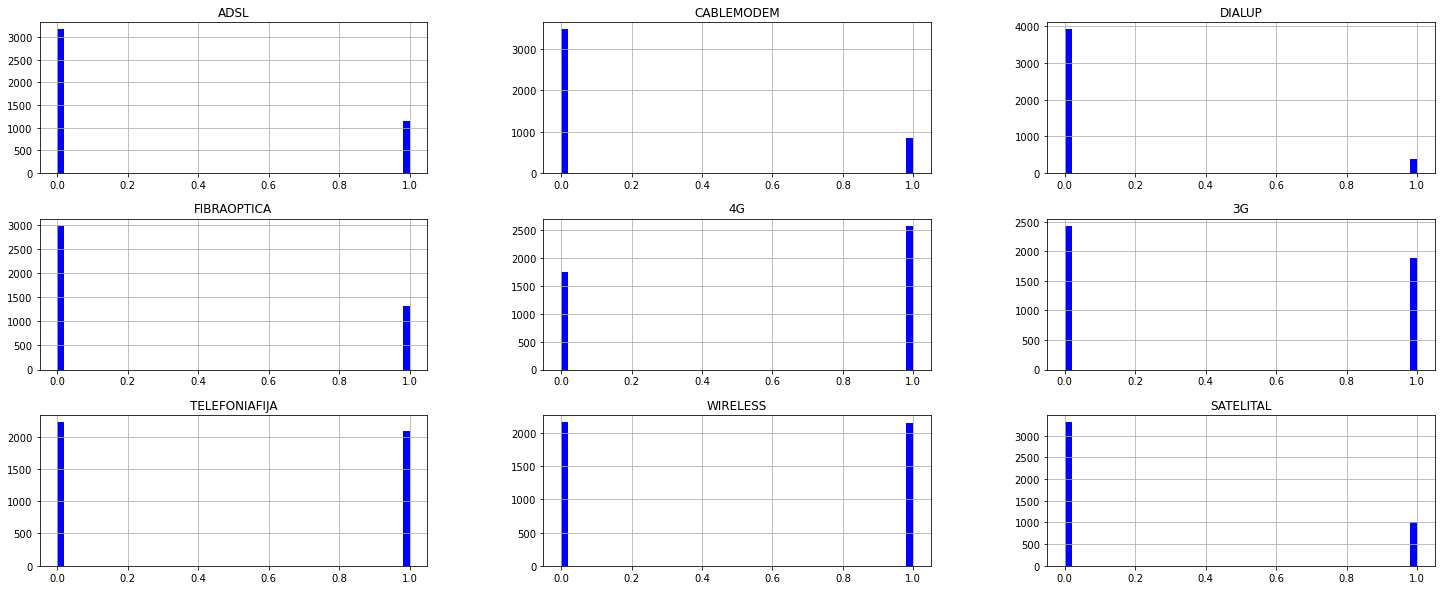

In [85]:
# Análisis rápido de las categorías usando un histograma.
data.hist(bins = 50, figsize = (25,10), color = 'b')

Como era de esperarse todas las gráficas son bimodales.

In [86]:
# Resumen global de estadisticos:
data.describe()

,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
count,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000
mean,0.266466,0.197356,0.091837,0.306354,0.596939,0.435993,0.483766,0.497449,0.231447
std,0.442162,0.398050,0.288829,0.461032,0.490570,0.495944,0.499794,0.500051,0.421806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Si nos centramos solo en la media, las localidades tienen como principal conectividad a internet a:

* 4G con un 59.7%
* WIRELESS con un 49.8%
* TELEFONIAFIJA con un 48.4%

In [87]:
# Guardamos este DataFrame para su analisis en Power BI.
data.to_csv('02_LocConectInter.csv', index=False)
print('Guardado.')

Guardado.


## Velocidad Media de bajada de Internet fijo

In [88]:
# Extraemos datos de la API
MY_API_KEY = 'C98wmDseqmuXTUVe7Z297LQBdUXD0yaqXLXJuSoh'
url = 'http://api.datosabiertos.enacom.gob.ar/api/v2/visualizations/VELOC-PROME-DE-BAJAD-DE/?auth_key=' + MY_API_KEY + '&output=csv'
data = pd.read_csv(url)
data.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,1,"55,11",Ene-Mar 2022
1,2021,4,"52,34",Oct-Dic 2021
2,2021,3,"48,46",Jul-Sept 2021
3,2021,2,"45,63",Abr-Jun 2021
4,2021,1,"43,11",Ene-Mar 2021


<AxesSubplot:>

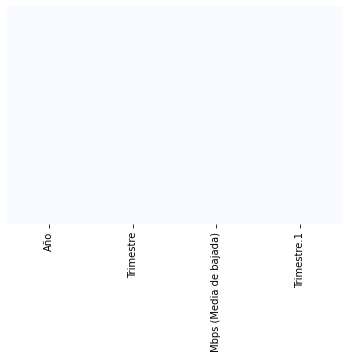

In [89]:
# Visualización de valores nulos en el DataFrame
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

No contiene valores nulos.

In [90]:
# Tipo de variable que tenemos
data.dtypes

Año                        int64
Trimestre                  int64
Mbps (Media de bajada)    object
Trimestre.1               object
dtype: object

La variable de 'Mbps (Media de bajada)' la esta tomando como tipo **object**, por lo tanto debemos corregir su formato y reemplazar las ',' por '.' para tenerla en formato **float64** . La columna 'Trimestre.1' se eliminará ya que es combinación de las columnas 'Año' y 'Trimestre'.

In [91]:
# Reemplazamos comas por puntos
data['Mbps (Media de bajada)'] = data['Mbps (Media de bajada)'].str.replace(',', '.')
# Cambio de tipo de variables
data['Mbps (Media de bajada)'] = data['Mbps (Media de bajada)'].astype('float64')
# Eliminamos la columna 'Trimestre.1' 
data.drop(['Trimestre.1'], axis=1, inplace=True)
data.head()

,Año,Trimestre,Mbps (Media de bajada)
0,2022,1,55.11
1,2021,4,52.34
2,2021,3,48.46
3,2021,2,45.63
4,2021,1,43.11


In [92]:
# Tipo de variable corregidas
data.dtypes

Año                         int64
Trimestre                   int64
Mbps (Media de bajada)    float64
dtype: object

array([[<AxesSubplot:title={'center':'Año'}>,
        <AxesSubplot:title={'center':'Trimestre'}>],
       [<AxesSubplot:title={'center':'Mbps (Media de bajada)'}>,
        <AxesSubplot:>]], dtype=object)

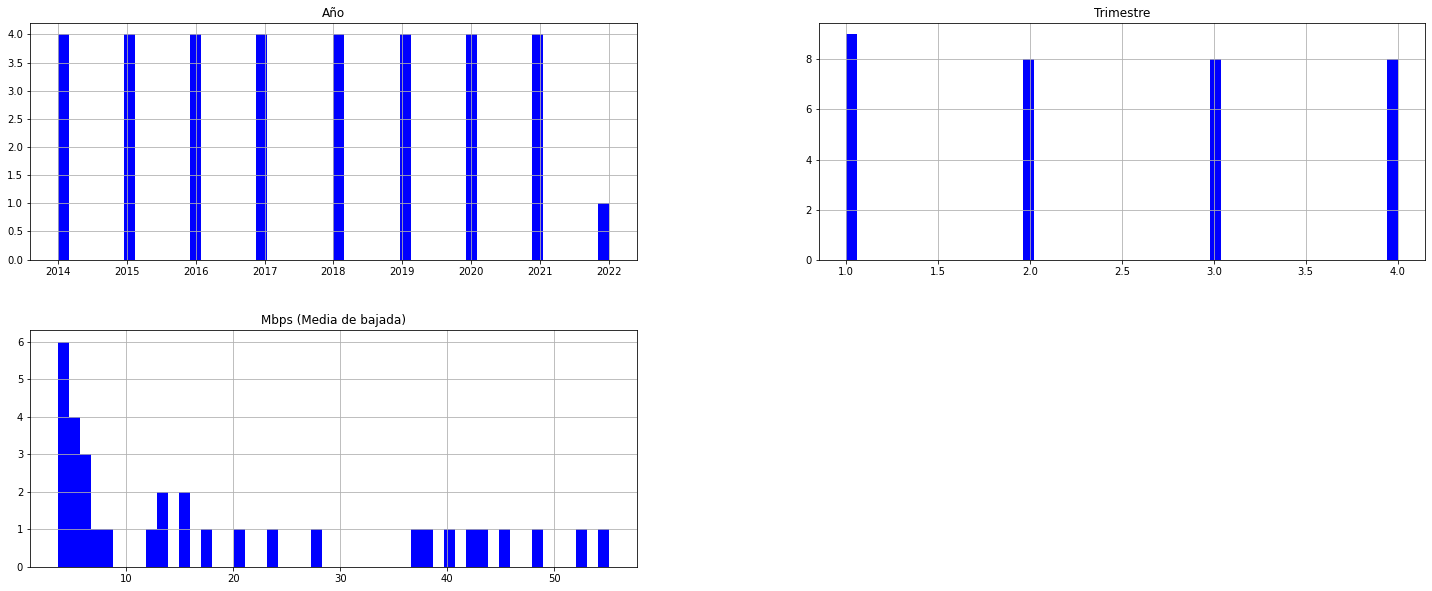

In [93]:
# Análisis rápido de las categorías usando un histograma.
data.hist(bins = 50, figsize = (25,10), color = 'b')

**Año**: Vemos que esta columna cuenta con solo un 25% de registros del 2022.

**Trimestre**: Esta columna no presenta anomalias tan aparentes.

**Mbps (Media de bajada)**: Presenta una distribución sesgada a la izquierda de cola larga, con la media de sus valores al rededor de 19.5 Mbps. 

In [94]:
# Resumen global de estadisticos:
data.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,33.000000,33.000000,33.000000
mean,2017.636364,2.454545,19.486364
std,2.421495,1.148121,17.140551
min,2014.000000,1.000000,3.620000
25%,2016.000000,1.000000,5.080000
50%,2018.000000,2.000000,13.220000
75%,2020.000000,3.000000,37.520000
max,2022.000000,4.000000,55.110000


In [95]:
# Guardamos este DataFrame para su analisis en Power BI.
data.to_csv('03_VelMedBajada.csv', index=False)
print('Guardado.')

Guardado.


# 2) Reclamos

## Reclamos mensuales por tipo de servicio

Extraemos los datos de la API

In [2]:
# Extraemos datos de la API
MY_API_KEY = 'C98wmDseqmuXTUVe7Z297LQBdUXD0yaqXLXJuSoh'
url = 'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/RECLA-MENSU-POR-TIPO-DE/data.csv/?auth_key=' + MY_API_KEY
data = pd.read_csv(url)
data

,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
0,2022,1,1.218,675,233,101,2.227
1,2022,2,1.241,567,238,92,2.138
2,2022,3,1.689,749,279,150,2.867
3,2022,4,1.341,635,250,95,2.321
4,2022,5,1.146,576,295,91,2.108
5,2022,6,965.000,471,214,80,1.730
6,2022,7,879.000,499,223,117,1.718
7,2022,8,914.000,478,302,88,1.782
8,2022,9,722.000,419,295,100,1.536
9,2022,10,759.000,434,241,107,1.541


<AxesSubplot:>

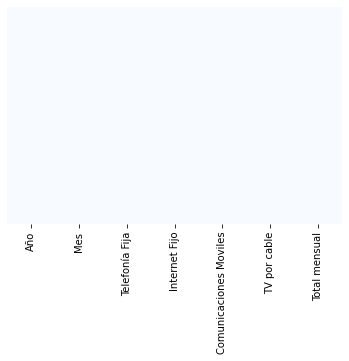

In [3]:
# Visualización de valores nulos en el DataFrame
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

No hay valores nulos.

In [4]:
# Tipo de variable que tenemos
data.dtypes

Año                         int64
Mes                         int64
Telefonía Fija            float64
Internet Fijo               int64
Comunicaciones Moviles      int64
TV por cable                int64
Total mensual             float64
dtype: object

Observamos que los valores de miles los esta tomando como valores enteros con decimales. Así que vamos a corregir esto.

In [5]:
# Corregimos el punto decimal para las columnas 'Telefonía Fija' y 'Total mensual':
data['Telefonía Fija'] = data[['Telefonía Fija']].apply(lambda x: x['Telefonía Fija']*1000 
                                                        if x['Telefonía Fija']-int(x['Telefonía Fija'])!=0 
                                                        else x['Telefonía Fija'], 
                                                        axis=1)

data['Total mensual'] = data[['Total mensual']].apply(lambda x: x['Total mensual']*1000 
                                                        if x['Total mensual']-int(x['Total mensual'])!=0 
                                                        else x['Total mensual'], 
                                                        axis=1)
# Pasamos a tipo Int64
data.head()

,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
0,2022,1,1218.0,675,233,101,2227.0
1,2022,2,1241.0,567,238,92,2138.0
2,2022,3,1689.0,749,279,150,2867.0
3,2022,4,1341.0,635,250,95,2321.0
4,2022,5,1146.0,576,295,91,2108.0


In [6]:
# Tipo de variable corregidas
data.dtypes

Año                         int64
Mes                         int64
Telefonía Fija            float64
Internet Fijo               int64
Comunicaciones Moviles      int64
TV por cable                int64
Total mensual             float64
dtype: object

array([[<AxesSubplot:title={'center':'Año'}>,
        <AxesSubplot:title={'center':'Mes'}>,
        <AxesSubplot:title={'center':'Telefonía Fija'}>],
       [<AxesSubplot:title={'center':'Internet Fijo'}>,
        <AxesSubplot:title={'center':'Comunicaciones Moviles'}>,
        <AxesSubplot:title={'center':'TV por cable'}>],
       [<AxesSubplot:title={'center':'Total mensual'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

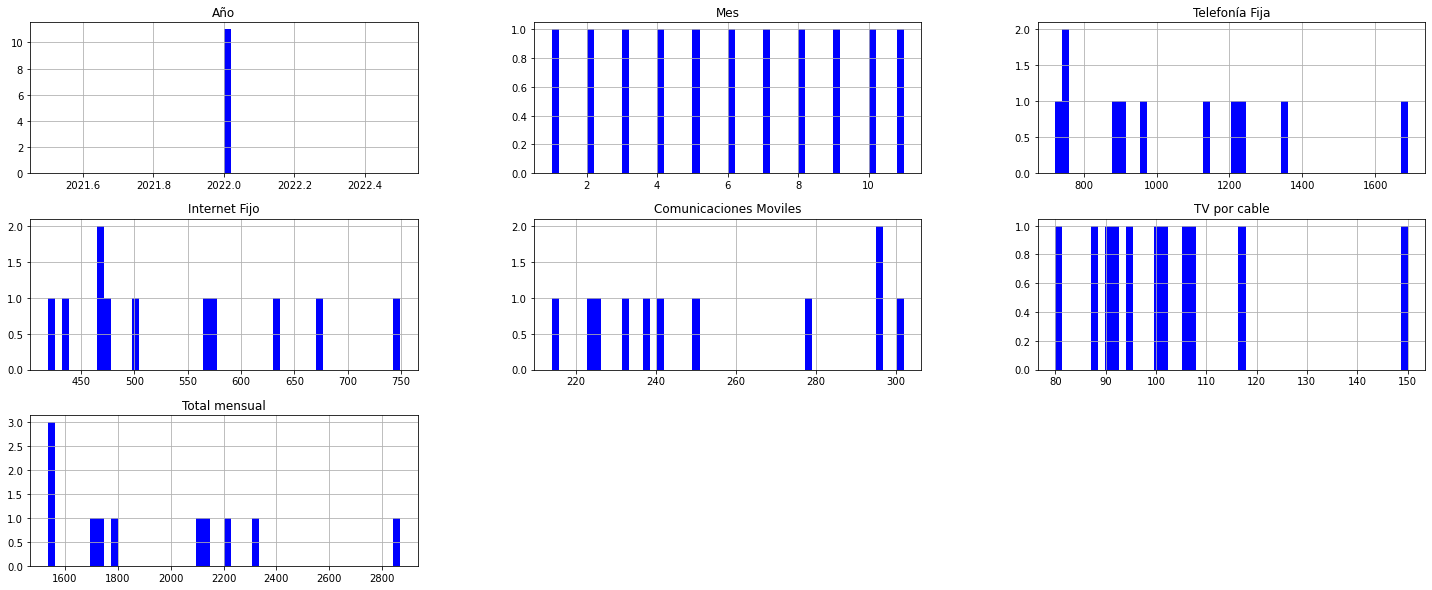

In [7]:
# Análisis rápido de las categorías usando un histograma.
data.hist(bins = 50, figsize = (25,10), color = 'b')

**Año**: Solo hay datos del año 2022.

**Telefonía Fija**: Presenta una distribución sesgada a la izquierda, con una media de 1057 reclamos mensuales. 

**Internet Fijo**: Presenta una distribución sesgada a la izquierda, con una media de 542 reclamos mensuales.

**Comunicaciones Moviles**: Presenta una distribución sesgada a la derecha, con una media de 254 reclamos mensuales. 

**TV por cable**: Presenta una tendencia uniforme, con una media de 102 reclamos mensuales. 

**Total mensual**: Presenta una distribución sesgada a la izquierda, con una media de 1956 reclamos mensuales.

In [8]:
# Resumen global de estadisticos:
data.describe()

,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2022.0,6.000000,1057.363636,542.636364,254.181818,102.454545,1956.636364
std,0.0,3.316625,299.900408,107.013338,32.430906,18.768930,417.160946
min,2022.0,1.000000,722.000000,419.000000,214.000000,80.000000,1536.000000
25%,2022.0,3.500000,819.000000,468.500000,229.500000,91.500000,1636.500000
50%,2022.0,6.000000,965.000000,499.000000,241.000000,100.000000,1782.000000
75%,2022.0,8.500000,1229.500000,605.500000,287.000000,106.500000,2182.500000
max,2022.0,11.000000,1689.000000,749.000000,302.000000,150.000000,2867.000000


In [9]:
# Guardamos este DataFrame para su analisis en Power BI.
data.to_csv('ReclamosMesTipoServ.csv', index=False)
print('Guardado.')

Guardado.


## Reclamos por operador y motivo de reclamo

In [10]:
# Extraemos datos de la API
MY_API_KEY = 'C98wmDseqmuXTUVe7Z297LQBdUXD0yaqXLXJuSoh'
url = 'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/RECLA-POR-OPERA-ANO-CORRI/data.csv/?auth_key=' + MY_API_KEY
data = pd.read_csv(url)
data

,Año,Mes,Motivo de Reclamo,Operador,Cantidad
0,2022,1,Facturación,AMX Argentina S.A. (Claro),9
1,2022,1,Facturación,DIRECTV Argentina S.A.L,4
2,2022,1,Facturación,Fibertel S.A. (TCI),3
3,2022,1,Facturación,Movistar - Telefonica Moviles Argentina S.A.,23
4,2022,1,Facturación,Otros,8
...,...,...,...,...,...
381,2022,11,Problemas Técnicos,Otros,51
382,2022,11,Problemas Técnicos,TELECENTRO S.A.,45
383,2022,11,Problemas Técnicos,Telecom Argentina S.A.,506
384,2022,11,Problemas Técnicos,Telefonica de Argentina S.A.,197


<AxesSubplot:>

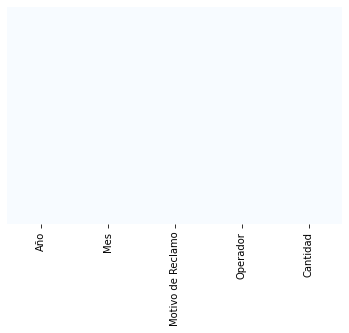

In [11]:
# Visualización de valores nulos en el DataFrame
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

No cuenta con valores nulos.

In [12]:
# Tipo de variable que tenemos
data.dtypes

Año                   int64
Mes                   int64
Motivo de Reclamo    object
Operador             object
Cantidad              int64
dtype: object

array([[<AxesSubplot:title={'center':'Año'}>,
        <AxesSubplot:title={'center':'Mes'}>],
       [<AxesSubplot:title={'center':'Cantidad'}>, <AxesSubplot:>]],
      dtype=object)

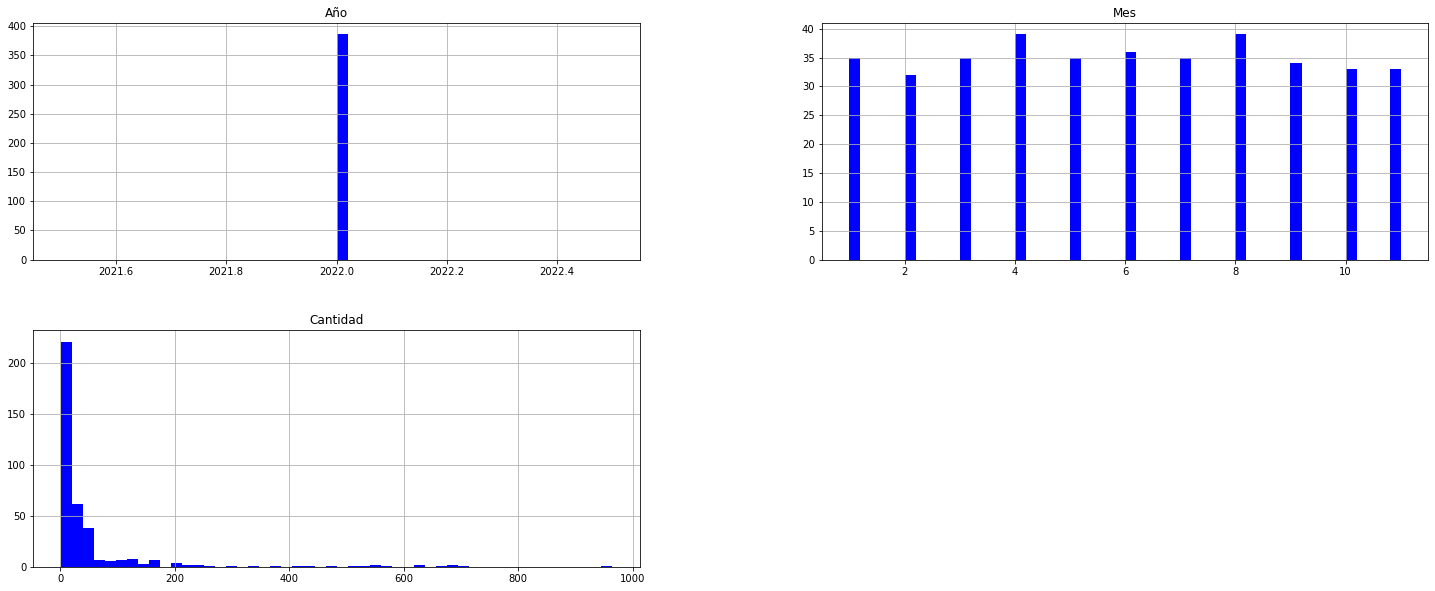

In [13]:
# Análisis rápido de las categorías usando un histograma.
data.hist(bins = 50, figsize = (25,10), color = 'b')

**Año**: Solo hay datos del año 2022.

**Cantidad**: Presenta una distribución sesgada a la izquierda, con una media de 56 reclamos por operador mensuales. 

In [14]:
# Resumen global de estadisticos:
data.describe()

,Año,Mes,Cantidad
count,386.0,386.000000,386.000000
mean,2022.0,5.976684,55.759067
std,0.0,3.117937,124.230354
min,2022.0,1.000000,1.000000
25%,2022.0,3.000000,5.000000
50%,2022.0,6.000000,15.000000
75%,2022.0,9.000000,41.000000
max,2022.0,11.000000,964.000000


In [15]:
# Guardamos este DataFrame para su analisis en Power BI.
data.to_csv('ReclamosMesOper.csv', index=False)
print('Guardado.')

Guardado.
